True Positives (TP): 26
False Positives (FP): 3
True Negatives (TN): 150
False Negatives (FN): 21
Precision: 0.8966
Recall: 0.5532


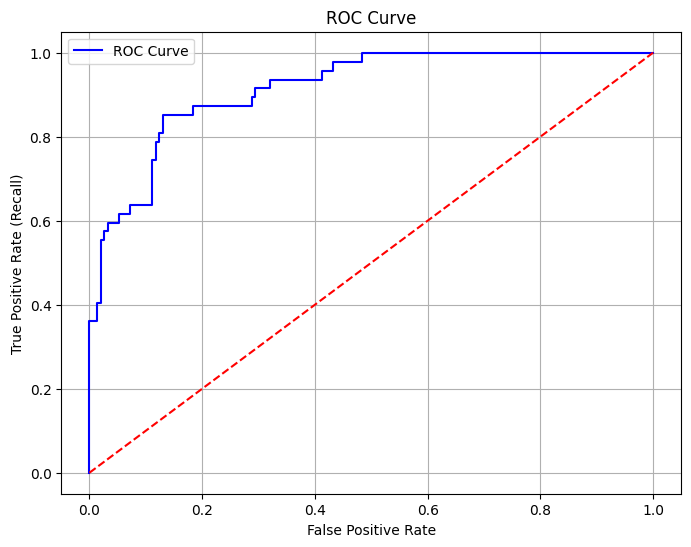

Minimum False Positive Rate with at least 90% recall: 0.2941


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_curve

# Load the dataset
df = pd.read_csv('hw4_data.csv')

# Extract columns as numpy arrays
model_output = df['model_output'].to_numpy()
true_class = df['true_class'].to_numpy()
y_pred = df['prediction'].to_numpy()

# Compute confusion matrix values
tn, fp, fn, tp = confusion_matrix(true_class, y_pred).ravel()

print(f"True Positives (TP): {tp}")
print(f"False Positives (FP): {fp}")
print(f"True Negatives (TN): {tn}")
print(f"False Negatives (FN): {fn}")

# Compute precision and recall
precision = precision_score(true_class, y_pred)
recall = recall_score(true_class, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(true_class, model_output)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="ROC Curve", color="blue")
plt.plot([0, 1], [0, 1], 'r--')  # Random classifier line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

# Find the minimum False Positive Rate (FPR) with at least 90% recall
valid_thresholds = thresholds[tpr >= 0.90]  # Get thresholds that satisfy recall >= 90%
min_fpr = min(fpr[tpr >= 0.90])  # Find the smallest FPR in that range

print(f"Minimum False Positive Rate with at least 90% recall: {min_fpr:.4f}")
